<a href="https://colab.research.google.com/github/ManelSoengas/Constituency-Parser-French/blob/master/Copy_of_SA_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
!pip install transformers
from transformers import BertTokenizer, TFBertForSequenceClassification

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.7 MB/s eta 0:00:00


In [ ]:
# Cargar datos preprocesados
train_data = pd.read_csv('/content/clean_train.csv', delimiter=',', encoding='latin1')
test_data = pd.read_csv('/content/clean_test.csv', delimiter=',', encoding='latin1')


In [ ]:
print(test_data.head())

                                                text   task1
0  suicidir girls belleza alternativo recopilacin...  sexist
1                     senator gillibrand dumb blonde  sexist
2  indignidad indecencia tener cara traicion juez...  sexist
3  disfrasar mediocridad antuna pretexto covid te...  sexist
4                                hacis sentir nenaza  sexist


In [ ]:
X = train_data['text'].values
y = train_data['task1'].values
Z = test_data['text'].values
z= test_data['task1'].values

In [ ]:
# Dividir los datos en entrenamiento y prueba
train_text, val_text, train_task1, val_task1 = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
print(train_text.head())

AttributeError: ignored

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4338 non-null   object
 1   task1   4368 non-null   object
dtypes: object(2)
memory usage: 68.4+ KB


In [ ]:

# Cargar el tokenizador de BERT
#tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', vocab_size=30522)
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')


# Cargar el modelo BERT pre-entrenado
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np

test_data['text'] = test_data['text'].fillna('')  # Rellenar los valores perdidos con una cadena vacía

token_lens = []

for txt in test_data['text'].values:
    tokens = tokenizer.encode(txt, max_length=500, truncation=True)
    token_lens.append(len(tokens))
    
max_len=np.max(token_lens)

In [ ]:
import numpy as np

train_data['text'] = train_data['text'].fillna('')  # Rellenar los valores perdidos con una cadena vacía

token_lenss = []

for txt in train_data['text'].values:
    tokens = tokenizer.encode(txt, max_length=50, truncation=True)
    token_lenss.append(len(tokens))
    
max_len=np.max(token_lenss)

In [ ]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 80


In [ ]:
MAX_LEN=255

In [ ]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            truncation=True,
            truncation_strategy='longest_first',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)


In [ ]:
train_input_ids, train_attention_masks = tokenize(train_text, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(val_text, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(Z, MAX_LEN)

In [ ]:
print(test_input_ids.shape)
print(test_input_ids)

print(test_attention_masks.shape)
print(test_attention_masks)

(4368, 80)
[[   101  21053  43275 ...      0      0      0]
 [   101  40954  38356 ...      0      0      0]
 [   101  30386  58445 ...      0      0      0]
 ...
 [   101 102512  15217 ...      0      0      0]
 [   101  36980  10354 ...      0      0      0]
 [   101  72378  10453 ...      0      0      0]]
(4368, 80)
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
def create_model(bert_model, max_len=MAX_LEN):
    
    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.BinaryCrossentropy()
    accuracy = tf.keras.metrics.BinaryAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    embeddings = bert_model([input_ids,attention_masks])[1]
    
    output = tf.keras.layers.Dense(2, activation="softmax")(embeddings)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    
    model.compile(opt, loss=loss, metrics=accuracy)
    
    
    return model

In [ ]:
#keras
import tensorflow as tf
from tensorflow import keras


#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 80)]         0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 80)]         0           []                               
                                                                                                  
 tf_bert_model_3 (TFBertModel)  TFBaseModelOutputWi  109482240   ['input_7[0][0]',                
                                thPoolingAndCrossAt               'input_8[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 80,                                          

In [ ]:
from sklearn import preprocessing
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(train_task1).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(val_task1).reshape(-1, 1)).toarray()
z_test = ohe.fit_transform(np.array(z).reshape(-1, 1)).toarray()

In [ ]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=4, batch_size=32)

In [ ]:
result_bert = model.predict([test_input_ids,test_attention_masks])

In [ ]:
import tensorflow as tf

# Convertir los datos a tensores de TensorFlow
train_dataset = tf.data.Dataset.from_tensor_slices((train_input_ids, train_attention_masks, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_input_ids, val_attention_masks, val_labels))

# Ajuste fino del modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
model.fit(train_dataset.shuffle(100).batch(16), epochs=3, batch_size=16, validation_data=val_dataset.batch(16))


In [ ]:
def tokenize_roberta(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer_roberta.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            truncation_strategy='longest_first',
            return_attention_mask=True
            
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [ ]:
tokenizer_roberta = RobertaTokenizerFast.from_pretrained("roberta-base")

In [ ]:
train_input_ids, train_attention_masks = tokenize_roberta(train_text, MAX_LEN)
val_input_ids, val_attention_masks = tokenize_roberta(val_text, MAX_LEN)
test_input_ids, test_attention_masks = tokenize_roberta(Z, MAX_LEN)

In [ ]:
print(train_input_ids.shape)
print(val_input_ids.shape)
print(test_input_ids.shape)


(5581, 255)
(1396, 255)
(4368, 255)


In [ ]:
print(train_attention_masks.shape)
print(val_attention_masks.shape)
print(test_attention_masks.shape)


(5581, 128)
(1396, 128)
(4368, 128)


In [ ]:
def create_model(bert_model, max_len=MAX_LEN):
    
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.BinaryCrossentropy()
    accuracy = tf.keras.metrics.BinaryAccuracy()

    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    output = bert_model([input_ids,attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(output)
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    model.compile(opt, loss=loss, metrics=accuracy)
    return model

In [ ]:
def create_model(bert_model, max_len=MAX_LEN):
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.BinaryCrossentropy()
    accuracy = tf.keras.metrics.BinaryAccuracy()

    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')
    output = bert_model([input_ids, attention_masks])
    output = output[1]
    
    # Agregar Dropout
    output = tf.keras.layers.Dropout(0.5)(output)
    
    output = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(output)
    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)
    
    # Compilar el modelo
    model.compile(opt, loss=loss, metrics=accuracy)
    
    # Agregar Early Stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')
    
    return model, early_stopping


In [ ]:
roberta_model = TFRobertaModel.from_pretrained('roberta-base')


Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
#model = create_model(roberta_model, MAX_LEN)
model, early_stopping = create_model(roberta_model, MAX_LEN)
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 255)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 255)]        0           []                               
                                                                                                  
 tf_roberta_model_1 (TFRobertaM  TFBaseModelOutputWi  124645632  ['input_1[0][0]',                
 odel)                          thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 255,                                           

In [ ]:
history_2 = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=6, batch_size=30)


Epoch 1/6
187/187 [==============================] - 337s 2s/step - loss: 0.6830 - binary_accuracy: 0.5675 - val_loss: 0.6067 - val_binary_accuracy: 0.6862
Epoch 2/6
187/187 [==============================] - 286s 2s/step - loss: 0.5746 - binary_accuracy: 0.7054 - val_loss: 0.5481 - val_binary_accuracy: 0.7128
Epoch 3/6
187/187 [==============================] - 305s 2s/step - loss: 0.5268 - binary_accuracy: 0.7484 - val_loss: 0.5254 - val_binary_accuracy: 0.7292
Epoch 4/6
187/187 [==============================] - 304s 2s/step - loss: 0.4563 - binary_accuracy: 0.7923 - val_loss: 0.5696 - val_binary_accuracy: 0.7307
Epoch 5/6
187/187 [==============================] - 304s 2s/step - loss: 0.3903 - binary_accuracy: 0.8285 - val_loss: 0.6067 - val_binary_accuracy: 0.7450
Epoch 6/6
187/187 [==============================] - 305s 2s/step - loss: 0.3341 - binary_accuracy: 0.8570 - val_loss: 0.6617 - val_binary_accuracy: 0.7414


In [ ]:
result_roberta = model.predict([test_input_ids,test_attention_masks])

137/137 [==============================] - 74s 516ms/step


In [ ]:
y_pred_roberta =  np.zeros_like(result_roberta)
y_pred_roberta[np.arange(len(y_pred_roberta)), result_roberta.argmax(1)] = 1

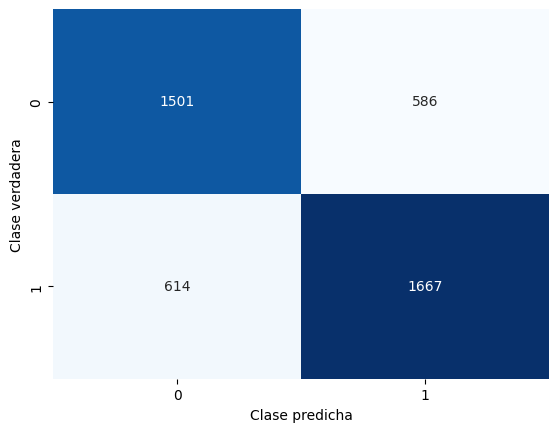

In [ ]:
#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que z_test.argmax(1) son las etiquetas reales y y_pred_roberta.argmax(1) son las etiquetas predichas
cm = confusion_matrix(z_test.argmax(1), y_pred_roberta.argmax(1))

# Crear un heatmap de la matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Añadir etiquetas a los ejes
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")

# Mostrar el gráfico
plt.show()


137/137 [==============================] - 71s 518ms/step
Resultados de RoBERTa:
[[0.10214166 0.8978584 ]
 [0.01524354 0.9847565 ]
 [0.95232934 0.04767067]
 ...
 [0.9594484  0.0405516 ]
 [0.12281539 0.8771846 ]
 [0.79009384 0.2099062 ]]
Predicciones de RoBERTa:
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


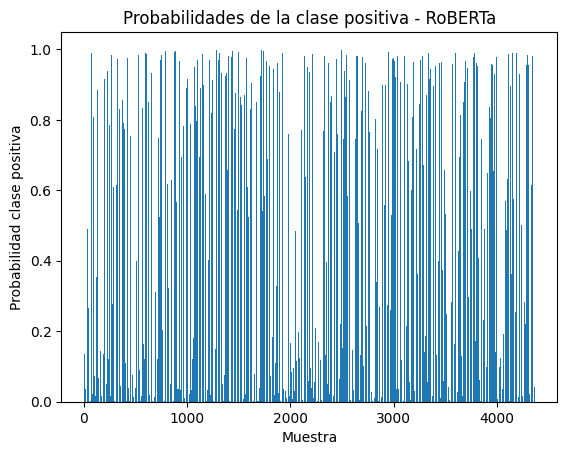

In [ ]:
result_roberta = model.predict([test_input_ids, test_attention_masks])
y_pred_roberta = np.zeros_like(result_roberta)
y_pred_roberta[np.arange(len(y_pred_roberta)), result_roberta.argmax(1)] = 1

# Imprimir result_roberta
print("Resultados de RoBERTa:")
print(result_roberta)

# Imprimir y_pred_roberta
print("Predicciones de RoBERTa:")
print(y_pred_roberta)

# Obtener las probabilidades de la clase positiva (etiqueta 1)
probabilities = result_roberta[:, 1]

# Crear índices para las muestras
indices = np.arange(len(probabilities))

# Generar gráfico de barras
plt.bar(indices, probabilities)
plt.xlabel("Muestra")
plt.ylabel("Probabilidad clase positiva")
plt.title("Probabilidades de la clase positiva - RoBERTa")
plt.show()


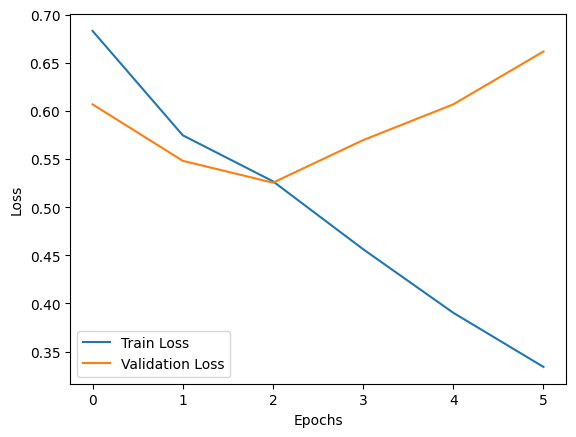

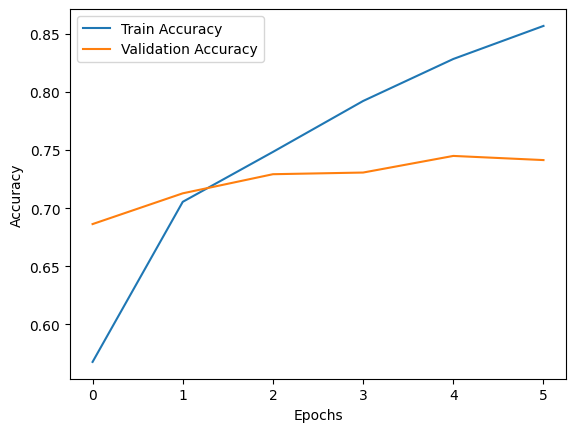

In [ ]:
import matplotlib.pyplot as plt

# Obtener las métricas de entrenamiento y validación del historial
train_loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
train_accuracy = history_2.history['binary_accuracy']
val_accuracy = history_2.history['val_binary_accuracy']

# Generar gráfica de pérdida
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generar gráfica de precisión
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


DATA_AUGMENTATION

In [ ]:
!pip install nlpaug


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 13.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nlpaug.augmenter.word as naw


In [ ]:
#train_data = pd.read_csv('ruta_del_archivo.csv')  # Leer el archivo CSV de entrenamiento
augmented_train_data = pd.DataFrame(columns=['text', 'task1'])  # DataFrame para datos aumentados


In [ ]:
augmenter = naw.SynonymAug(aug_src='wordnet')  # Puedes elegir diferentes técnicas de augmentation según tus necesidades


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
for index, row in train_data.iterrows():
    original_text = row['text']
    for _ in range(5):
        augmented_text = augmenter.augment(original_text)
        augmented_row = {'text': augmented_text, 'task1': row['task1']}
        augmented_train_data = augmented_train_data.append(augmented_row, ignore_index=True)



Streaming output truncated to the last 5000 lines.
<ipython-input-15-f9c4f9db9ce9>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_train_data = augmented_train_data.append(augmented_row, ignore_index=True)
<ipython-input-15-f9c4f9db9ce9>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_train_data = augmented_train_data.append(augmented_row, ignore_index=True)
<ipython-input-15-f9c4f9db9ce9>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_train_data = augmented_train_data.append(augmented_row, ignore_index=True)
<ipython-input-15-f9c4f9db9ce9>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_trai

In [ ]:
combined_train_data = pd.concat([train_data, augmented_train_data])


In [ ]:
print("Longitud del DataFrame combinado:", len(combined_train_data))


Longitud del DataFrame combinado: 41862


In [ ]:
print("Longitud del DataFrame combinado:", len(train_data))


Longitud del DataFrame combinado: 6977


In [ ]:
print(combined_train_data.head())

                                                text       task1
0  race baiting point accurately medium speculati...  non-sexist
1  assassin right assassin creed spit water like ...      sexist
2                                seguro hermoso nico  non-sexist
3  quin haber decir poder reclamar rbitro creer m...  non-sexist
4  feliz navidad leer rubio tontar mejor deseo ca...      sexist
